In [1]:
import warnings
warnings.filterwarnings('ignore')

Split Data

In [2]:
import pandas as pd

train = pd.read_csv(r'train_after_selection.csv')

X = train.drop(['Response', 'Unnamed: 0'], axis=1)
y = train['Response']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
X_train.sample(3)

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
43448,1,24.0,0,0,0,152.0,1,0
33801,1,11.0,1,0,0,152.0,0,0
29974,1,41.0,1,1,0,152.0,1,0


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63217 entries, 19573 to 15795
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Driving_License                 63217 non-null  int64  
 1   Region_Code                     63217 non-null  float64
 2   Previously_Insured              63217 non-null  int64  
 3   Vehicle_Age                     63217 non-null  int64  
 4   Vehicle_Damage                  63217 non-null  int64  
 5   Policy_Sales_Channel            63217 non-null  float64
 6   Age_Bin                         63217 non-null  int64  
 7   Vehicle_Damage_Age_Interaction  63217 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.3 MB


In [5]:
train.Response.value_counts()

Response
0    45155
1    45155
Name: count, dtype: int64

Model Evaluasi 

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc-auc (Test Proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (Train Proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): ' + str(score['train_score'].mean()))
    print('roc_auc (crossval test): ' + str(score['test_score'].mean()))


Fit Model

In [7]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.70
Recall (Test Set): 0.98
F1-Score (Test Set): 0.82
roc-auc (Test Proba): 0.81
roc_auc (Train Proba): 0.82
roc_auc (crossval train): 0.814887818856594
roc_auc (crossval test): 0.8146763039318266


Hyperparameter Tuning

In [30]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.70
Recall (Test Set): 0.98
F1-Score (Test Set): 0.82
roc-auc (Test Proba): 0.81
roc_auc (Train Proba): 0.82
roc_auc (crossval train): 0.8150567872609363
roc_auc (crossval test): 0.8149939146478339


Feature Importance

<Axes: ylabel='Feature'>

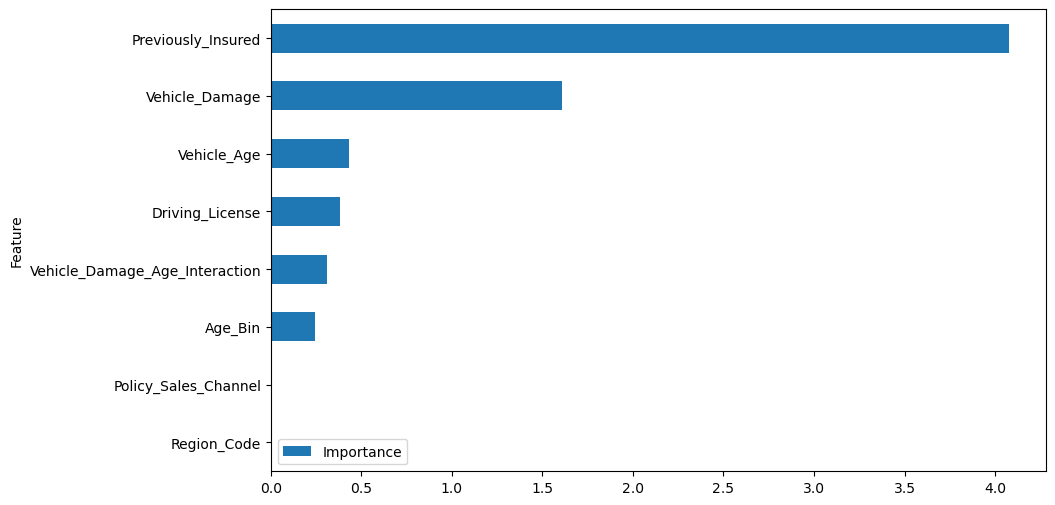

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Prediksi Data

In [15]:
df_test = pd.read_csv(r'test_after_selection.csv')
sub = pd.read_csv(r'sample_submission.csv')

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      127037 non-null  int64  
 1   Driving_License                 127037 non-null  int64  
 2   Region_Code                     127037 non-null  float64
 3   Previously_Insured              127037 non-null  int64  
 4   Vehicle_Age                     127037 non-null  int64  
 5   Vehicle_Damage                  127037 non-null  int64  
 6   Policy_Sales_Channel            127037 non-null  float64
 7   Age_Bin                         127037 non-null  int64  
 8   Vehicle_Damage_Age_Interaction  127037 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 8.7 MB


In [17]:
test = df_test.drop(columns=['Unnamed: 0'])
test.sample(3)

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
6371,1,28.0,0,1,1,26.0,0,0
99551,1,18.0,1,1,0,124.0,0,0
65656,1,41.0,1,1,1,26.0,0,0


In [18]:
sub.sample(3)

,id,Response
24969,406079,0
49730,430840,0
68823,449933,0


In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(test)
predict = [round(value) for value in y_pred]

In [26]:
test_2 = pd.DataFrame()

test_2['Response'] = sub['Response']
test_2["Pred_Response"] = predict

In [27]:
test_2

,Response,Pred_Response
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
127032,0,0
127033,0,1
127034,0,0
127035,0,0


In [28]:
accuracy= accuracy_score(test_2['Response'].values, test_2['Pred_Response'].values)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.35%
